# Heart Disease EDA

* Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed inline
%matplotlib inline

* Loding the Data

In [5]:
file_path = "HeartDisease.csv"
data = pd.read_csv(file_path)

In [6]:
# Display the first few rows
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [7]:
# Basic dataset information
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    102

In [8]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


* Summary Statistics

In [9]:
# Summary statistics for numerical columns
summary_stats = data.describe()
print("Summary Statistics:\n", summary_stats)

# Calculate mode for all columns
mode_values = data.mode().iloc[0]
print("\nMode Values:\n", mode_values)


Summary Statistics:
                age  resting_blood_pressure  cholestoral  Max_heart_rate  \
count  1025.000000             1025.000000   1025.00000     1025.000000   
mean     54.434146              131.611707    246.00000      149.114146   
std       9.072290               17.516718     51.59251       23.005724   
min      29.000000               94.000000    126.00000       71.000000   
25%      48.000000              120.000000    211.00000      132.000000   
50%      56.000000              130.000000    240.00000      152.000000   
75%      61.000000              140.000000    275.00000      166.000000   
max      77.000000              200.000000    564.00000      202.000000   

           oldpeak       target  
count  1025.000000  1025.000000  
mean      1.071512     0.513171  
std       1.175053     0.500070  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.800000     1.000000  
75%       1.800000     1.000000  
max       6.200000     1.000000

* Visualizations: Histograms

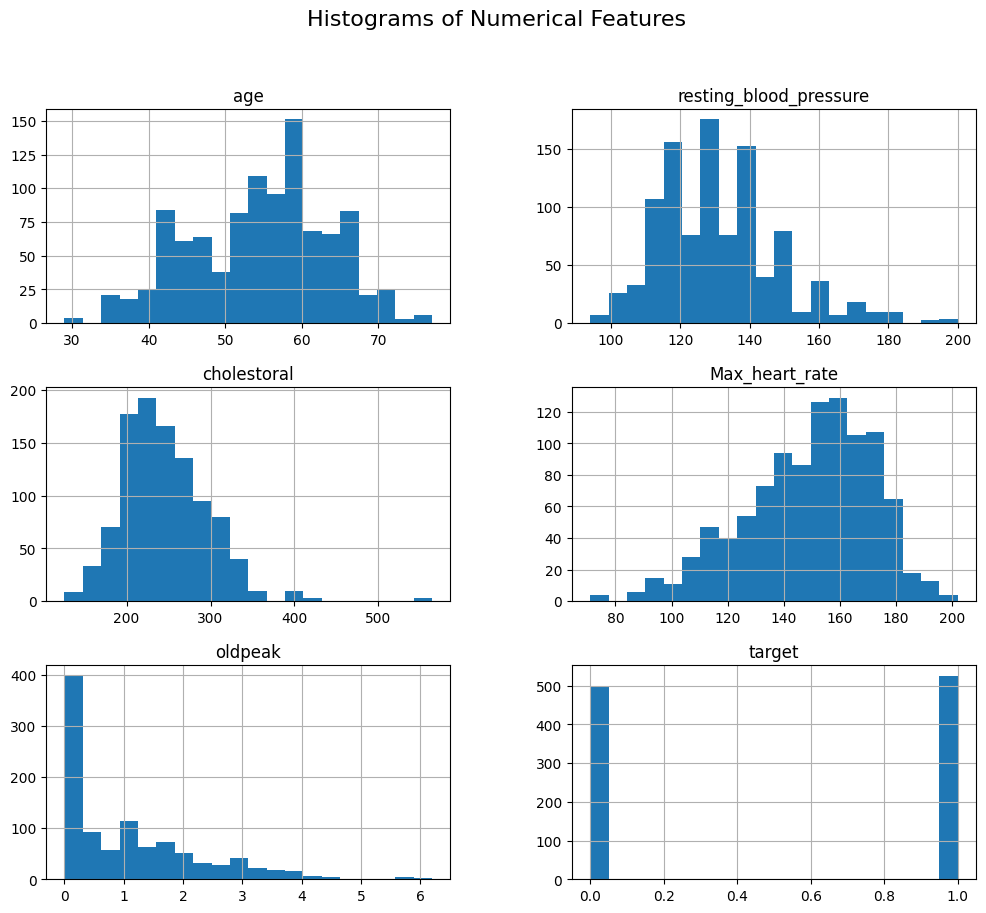

In [10]:
# Plot histograms for numerical features
data.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

* Correlation Analysis

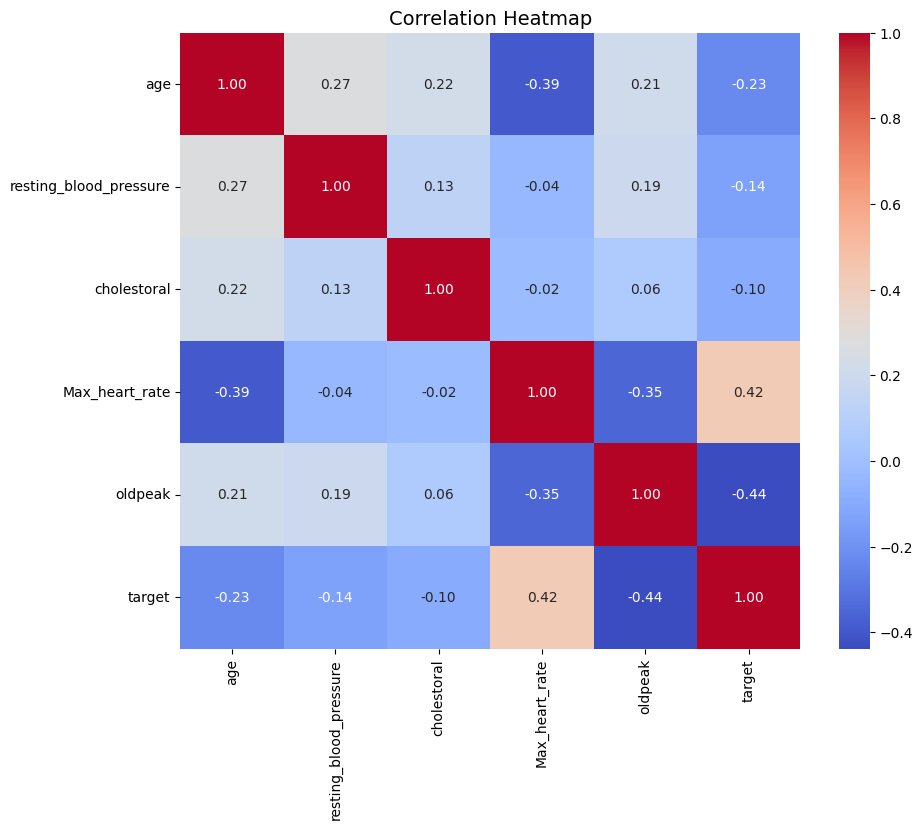

In [11]:
# Correlation heatmap
data_encoded = data.copy()

# Encode categorical columns (example using 'Gender' column)
if 'Gender' in data_encoded.columns:
    data_encoded['Gender'] = data_encoded['Gender'].map({'Male': 0, 'Female': 1})

# Select only numeric columns for correlation
numeric_data = data_encoded.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

* Missing Value Analysis

In [13]:
# Missing value counts
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("Missing Values and Percentages:\n", pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
}))

Missing Values and Percentages:
                                Missing Count  Percentage
age                                        0         0.0
sex                                        0         0.0
chest_pain_type                            0         0.0
resting_blood_pressure                     0         0.0
cholestoral                                0         0.0
fasting_blood_sugar                        0         0.0
rest_ecg                                   0         0.0
Max_heart_rate                             0         0.0
exercise_induced_angina                    0         0.0
oldpeak                                    0         0.0
slope                                      0         0.0
vessels_colored_by_flourosopy              0         0.0
thalassemia                                0         0.0
target                                     0         0.0


* Outlier Detection

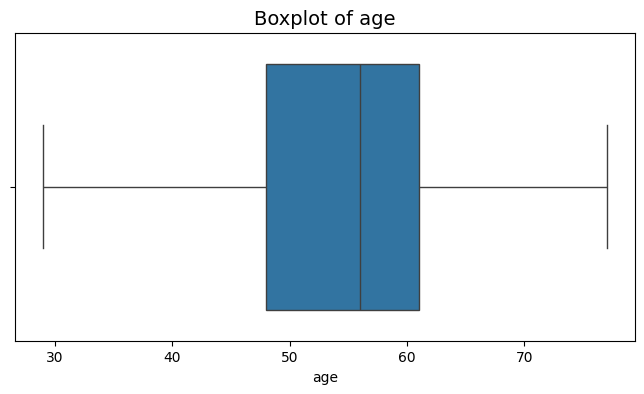

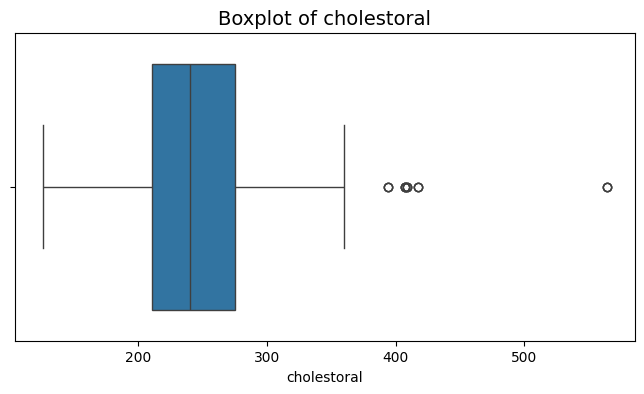

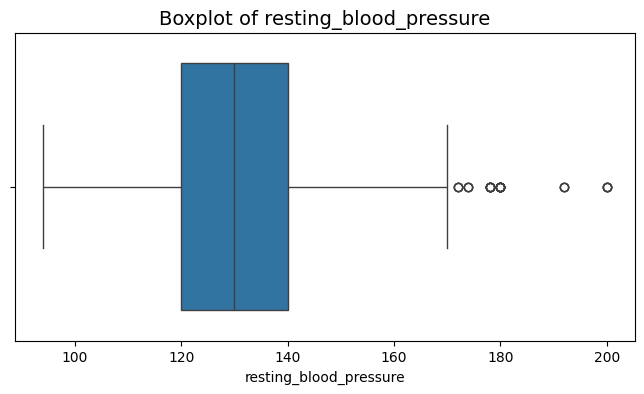

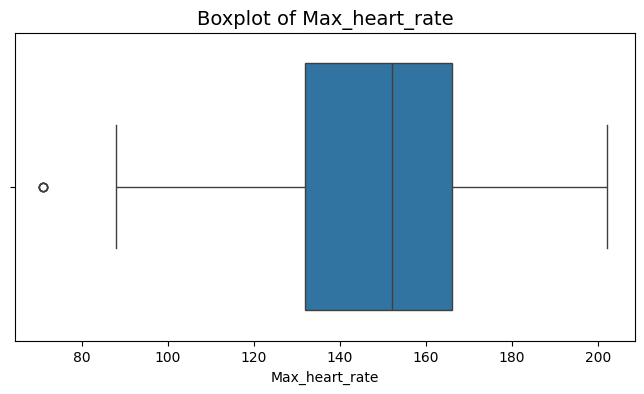

In [14]:
# Boxplots for numerical columns to detect outliers
numerical_cols = ['age', 'cholestoral', 'resting_blood_pressure', 'Max_heart_rate']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.show()


* Feature Distribution Analysis

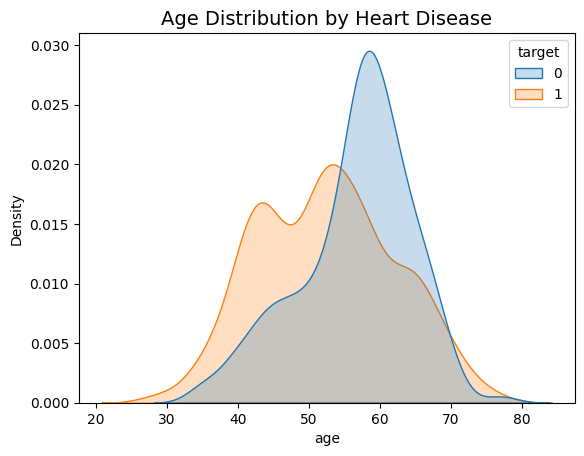

In [16]:
# Distribution of age by target variable
sns.kdeplot(data=data, x='age', hue='target', fill=True)
plt.title('Age Distribution by Heart Disease', fontsize=14)
plt.show()


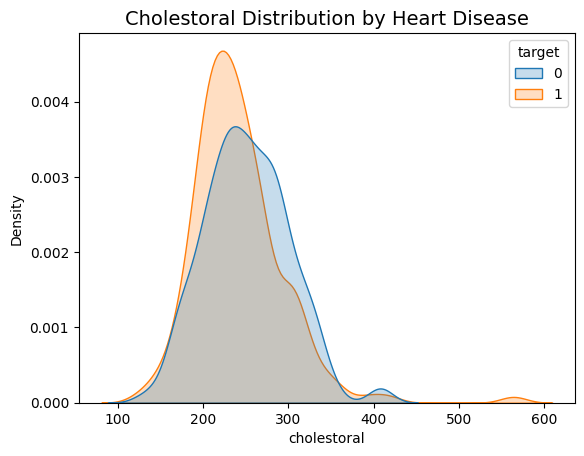

In [17]:
# Distribution of age by target variable
sns.kdeplot(data=data, x='cholestoral', hue='target', fill=True)
plt.title('Cholestoral Distribution by Heart Disease', fontsize=14)
plt.show()

* Data Types and Unique Value Counts

In [18]:
# Data types and unique value counts
data_types = data.dtypes
unique_counts = data.nunique()
print("Data Types and Unique Value Counts:\n", pd.DataFrame({
    'Data Type': data_types,
    'Unique Values': unique_counts
}))


Data Types and Unique Value Counts:
                               Data Type  Unique Values
age                               int64             41
sex                              object              2
chest_pain_type                  object              4
resting_blood_pressure            int64             49
cholestoral                       int64            152
fasting_blood_sugar              object              2
rest_ecg                         object              3
Max_heart_rate                    int64             91
exercise_induced_angina          object              2
oldpeak                         float64             40
slope                            object              3
vessels_colored_by_flourosopy    object              5
thalassemia                      object              4
target                            int64              2


* Trend Analysis

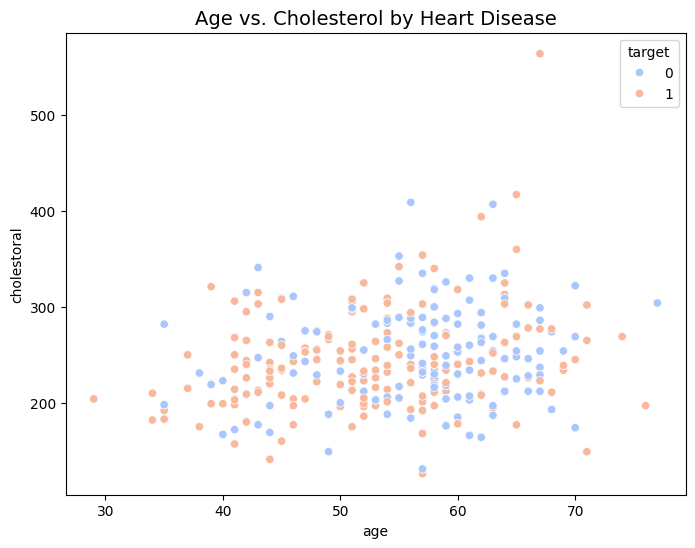

In [19]:
# Scatter plot of age vs. cholesterol
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='age', y='cholestoral', hue='target', palette='coolwarm')
plt.title('Age vs. Cholesterol by Heart Disease', fontsize=14)
plt.show()


* Grouped Aggregations

Grouped Mean Statistics by Target:
               age  resting_blood_pressure  cholestoral  Max_heart_rate  \
target                                                                   
0       56.569138              134.106212   251.292585      139.130261   
1       52.408745              129.245247   240.979087      158.585551   

         oldpeak  target  
target                    
0       1.600200     0.0  
1       0.569962     1.0  


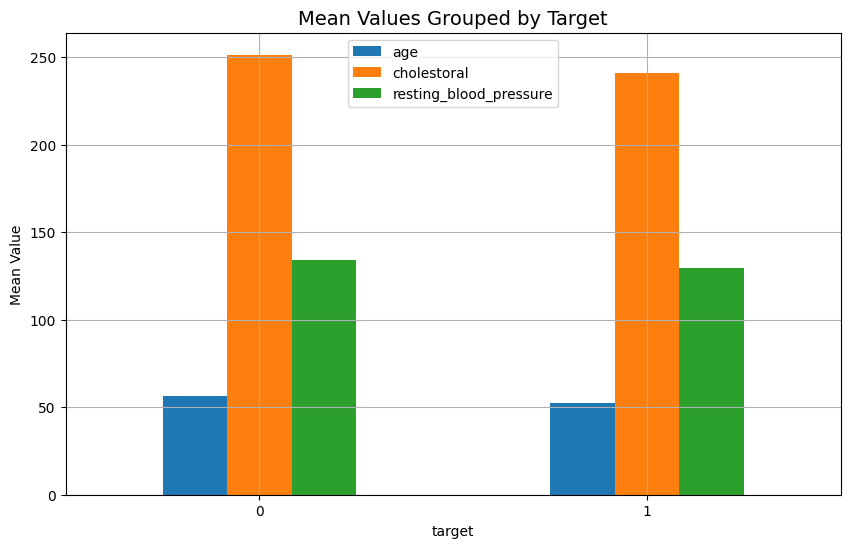

In [20]:
# Ensure all numeric columns are included
numeric_cols = data.select_dtypes(include=['number']).columns

# Perform grouped aggregation using numeric columns
grouped_stats = data[numeric_cols].groupby(data['target']).mean()
print("Grouped Mean Statistics by Target:\n", grouped_stats)

# Visualize grouped aggregations
grouped_stats[['age', 'cholestoral', 'resting_blood_pressure']].plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values Grouped by Target', fontsize=14)
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


* Pairwise Relationships

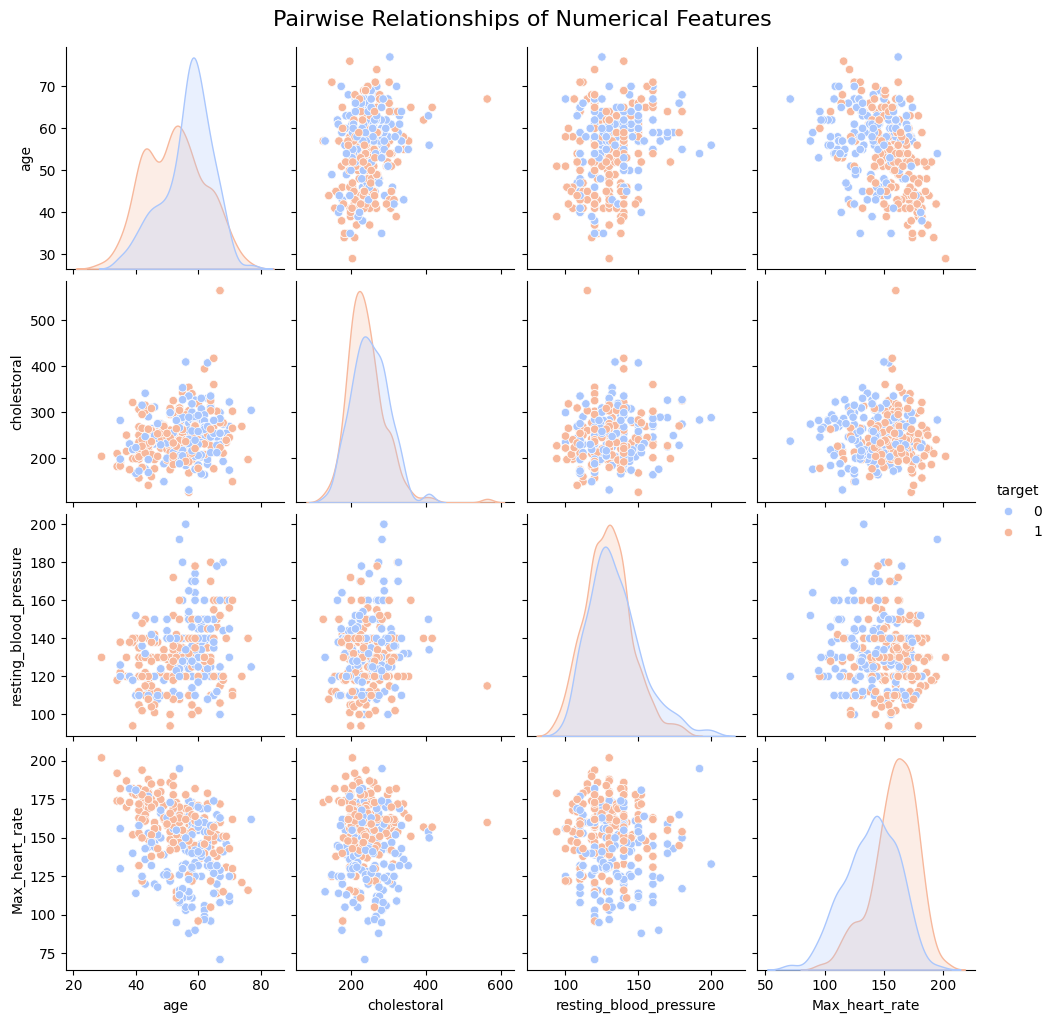

In [21]:
# Pairplot for numerical features grouped by target
sns.pairplot(data, vars=['age', 'cholestoral', 'resting_blood_pressure', 'Max_heart_rate'], hue='target', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Numerical Features', y=1.02, fontsize=16)
plt.show()


# Data Preprocessing For ML

* Importing Libraries

In [22]:
import pandas as pd
import numpy as np

* Loding the Data

In [23]:
file_path = "HeartDisease.csv"
data = pd.read_csv(file_path)
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


* Step 1: Handle Missing Values

In [24]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


Fortunately we don't have any missing values.

* Step 2: Encode Categorical Variables

In [25]:
# Columns to encode
categorical_cols = [
    "sex", "chest_pain_type", "fasting_blood_sugar", 
    "rest_ecg", "exercise_induced_angina", "slope", 
    "vessels_colored_by_flourosopy", "thalassemia"
]

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Check the resulting dataset
data_encoded.head()


,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target,sex_Male,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,...,exercise_induced_angina_Yes,slope_Flat,slope_Upsloping,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
0,52,125,212,168,1.0,0,True,False,False,True,...,False,False,False,False,False,True,False,False,False,True
1,53,140,203,155,3.1,0,True,False,False,True,...,True,False,True,False,False,False,True,False,False,True
2,70,145,174,125,2.6,0,True,False,False,True,...,True,False,True,False,False,False,True,False,False,True
3,61,148,203,161,0.0,0,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
4,62,138,294,106,1.9,0,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False


* Step 3: Scale or Normalize Numerical Features

In [26]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
numerical_cols = ["age", "resting_blood_pressure", "cholestoral", "Max_heart_rate", "oldpeak"]

# Apply standard scaling
scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Check scaled data
print(data_encoded[numerical_cols].head())


        age  resting_blood_pressure  cholestoral  Max_heart_rate   oldpeak
0 -0.268437               -0.377636    -0.659332        0.821321 -0.060888
1 -0.158157                0.479107    -0.833861        0.255968  1.727137
2  1.716595                0.764688    -1.396233       -1.048692  1.301417
3  0.724079                0.936037    -0.833861        0.516900 -0.912329
4  0.834359                0.364875     0.930822       -1.874977  0.705408


* Step 4: Split the Dataset into Training and Testing Sets

In [27]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = data_encoded.drop("target", axis=1)
y = data_encoded["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (820, 22)
Testing Set Size: (205, 22)


________________________________________________________________________________________________________________________________

# Machine Learning Model Training and Evaluation

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       102
           1       0.78      0.88      0.83       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



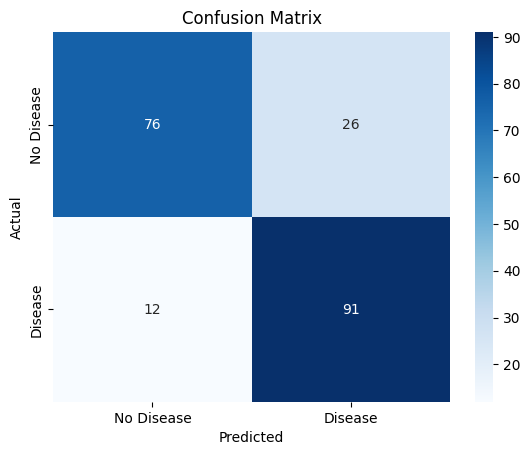

In [28]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Initialize Logistic Regression model
model = LogisticRegression(random_state=42)

# Step 2: Train the model
model.fit(X_train, y_train)

# Step 3: Make predictions on the testing set
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


* Saving The Model

In [29]:
import pickle

# Save the trained model
with open("heart_disease_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully.")


Model saved successfully.
